In [1]:
import numpy as np

import matplotlib.pyplot as plt

from M1S_tools import ZernikeMaskedFit

plt.jet()

## bending modes & influence matrices etc from Buddy #####################
Data not exist. Are you sure they are there?
## bending modes & influence matrices etc from Trupti #####################
Data not exist. Are you sure they are there?


<Figure size 640x480 with 0 Axes>

## displace the surface geometrically, and project displacements to surface normal

translate M1S1 in radial direction (along +y of M1S1 coordinate system)

In [2]:
def surfFunc(r2):
    return r2/(radius_of_curvature+np.sqrt(radius_of_curvature**2-(1+conic)*r2))

n_of_zernikes = 28
r_S1_center_in_S7 = 8.710 #distance to S1 optical axis in m
diameter_of_CA = 8.365 #CA diamter in m
radius_of_curvature = 36.000 #radius of curvature in m
conic = -0.998286
radius_of_CA = diameter_of_CA/2.0
y_S1_center = r_S1_center_in_S7
x_S1_center = 0
n_nodes_along_radius = 100 #number of grid points along radius (including center)
xvec = np.arange(-radius_of_CA, radius_of_CA+1e-6, 
                 radius_of_CA/n_nodes_along_radius)+x_S1_center
yvec = np.arange(-radius_of_CA, radius_of_CA+1e-6, 
                 radius_of_CA/n_nodes_along_radius)+y_S1_center
x_in_parent,y_in_parent = np.meshgrid(xvec, yvec)
r2_in_parent = x_in_parent**2+y_in_parent**2
z = surfFunc(r2_in_parent)
mask = np.zeros_like(z)
mask[np.sqrt((x_in_parent-x_S1_center)**2+(y_in_parent-y_S1_center)**2)<radius_of_CA]=1
z[mask==0] = np.nan

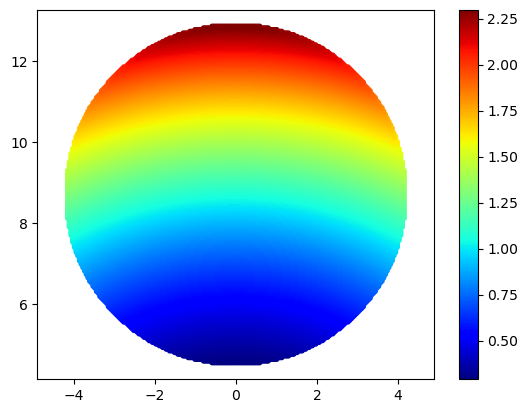

In [3]:
plt.scatter(x_in_parent,y_in_parent, 10, z)
plt.axis('equal')
plt.colorbar();

In [4]:
x_in_S1, y_in_S1 = np.meshgrid(xvec-x_S1_center, yvec-y_S1_center)

### Use the derivatives on the surface to get the surface normal unit vectors

In [5]:
e = 1e-6
zx = surfFunc((x_in_parent+e)**2+y_in_parent**2)
ux1=-np.sin(np.arctan((zx - z)/e))
zy = surfFunc(x_in_parent**2+(y_in_parent+e)**2)
uy1=-np.sin(np.arctan((zy - z)/e))
uz1=np.sqrt(1-ux1*ux1-uy1*uy1)
ux = ux1
uy = uy1
uz = uz1

#The below can be a good sanity check (which helps confirm we are not getting the signs confused)
if 0:
    #get surface normal vectors by drawing a arrow from a node to the center of curvature 
    #(OSS coordinate=(0,0,radius_of_curvature))
    ux = 0-x_in_parent
    uy = 0-y_in_parent
    uz = radius_of_curvature-z
    ur = np.sqrt(ux**2+uy**2+uz**2)
    ux /= ur
    uy /= ur
    uz /= ur

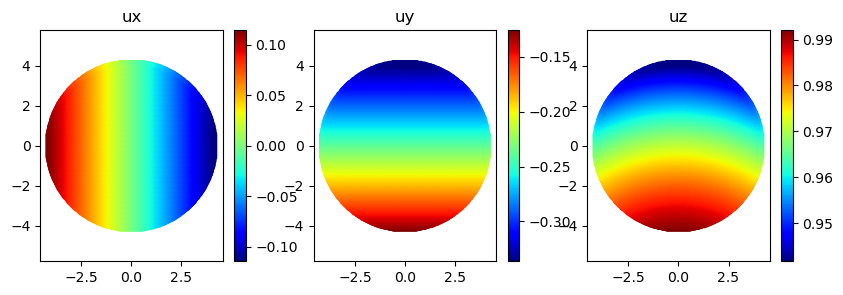

In [6]:
fig, ax = plt.subplots(1,3, figsize=(10,3))
img = ax[0].scatter(x_in_S1,y_in_S1,10, c=ux)
ax[0].axis('equal')
ax[0].set_title('ux')
fig.colorbar(img, ax=ax[0]);

img = ax[1].scatter(x_in_S1,y_in_S1,10, c=uy)
ax[1].axis('equal')
ax[1].set_title('uy')
fig.colorbar(img, ax=ax[1]);

img = ax[2].scatter(x_in_S1,y_in_S1,10, c=uz)
ax[2].axis('equal')
ax[2].set_title('uz')
fig.colorbar(img, ax=ax[2]);

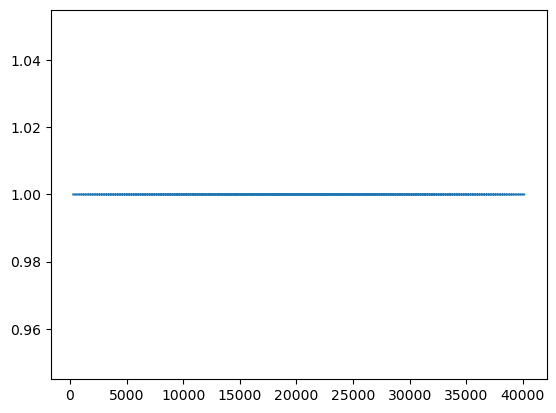

In [7]:
#verify that these are unit vectors
plt.plot(np.sqrt(ux**2+uy**2+uz**2).flatten())

## Ty first, (then we will do Tx, Tz, Rx, Ry, Rz)

#### Radial shift of 1mm (we shift this along y-axis of M1-S1; the angle between x/y plane of M1-S1 and x/y plane of M1-S7 is 13.60 deg)

The angle between M1S1 back plate and x/y plane of M1-S7 is 13.52 deg.

### same displacement vector for every node (so we only calculate this for S1 center!!!)

In [8]:
#for S1 center
x0 = x_S1_center
y0 = y_S1_center
r2_0 = x0**2+y0**2
z0 = surfFunc(r2_0)

In [9]:
tt = 1e-3 #shift of 1mm
realTheta = np.rad2deg(np.arctan((surfFunc(x0**2+(y0+e)**2)-z0)/e))
print(realTheta, ' vs 13.601685 #theta_M1, see GMT-REF-00189, Sec 3.8')
#realTheta = 13.522 #theta_B, see GMT-REF-00189, Sec 3.8 #if the radial shift is along the back surface

13.601685287856892  vs 13.601685 #theta_M1, see GMT-REF-00189, Sec 3.8


In [10]:
tx = 0
ty = tt*np.cos(np.radians(realTheta))
tz = tt*np.sin(np.radians(realTheta))

In [11]:
tn = tx*ux+ty*uy+tz*uz #inner product

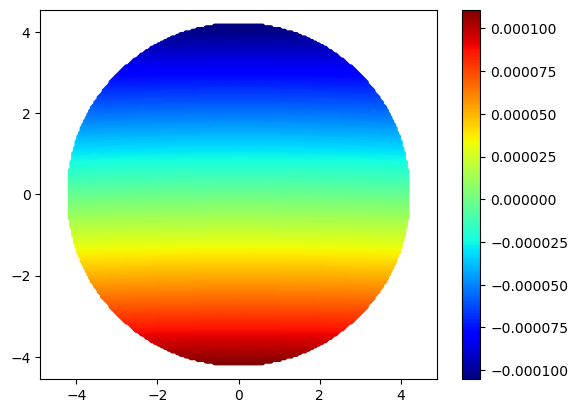

In [12]:
plt.scatter(x_in_S1,y_in_S1, 10, c=tn)
plt.axis('equal')
plt.colorbar();

In [13]:
xfit = x_in_S1/radius_of_CA
yfit = y_in_S1/radius_of_CA
zer_ty = ZernikeMaskedFit(tn, xfit, yfit, n_of_zernikes, mask, 0)*1e9 #turn m into nm

In [14]:
print(zer_ty[4-1], np.sqrt(zer_ty[5-1]**2 + zer_ty[6-1]**2), np.sqrt(zer_ty[7-1]**2 + zer_ty[8-1]**2))
print('table col1 (radial shift) = 799, 539, 49')
print('table col2 = __, 1280, 168')

179.55049298180566 917.3078518255919 49.94332976476091
table col1 (radial shift) = 799, 539, 49
table col2 = __, 1280, 168


In [15]:
zer_ty

array([ 3.13305730e+02, -1.93370599e-04, -5.47442838e+04,  1.79550493e+02,
       -2.19610910e-06, -9.17307852e+02,  4.99433298e+01,  1.51154343e-06,
       -5.51888130e+01,  4.73478289e-07, -1.03198855e+00,  2.59187908e+00,
       -2.22715455e-07, -9.45169969e-01, -6.66228682e-07,  6.16895009e-07,
       -5.67522625e-02,  8.38402251e-07,  6.04110063e-02, -6.69485312e-08,
       -6.08412452e-02,  2.85662405e-03,  2.63175254e-08, -6.94715397e-03,
        6.01857990e-07,  3.88940110e-03, -8.60241579e-07, -6.90996694e-03])

In [16]:
np.mean(tn[mask==1])*1e9

322.36200636021863

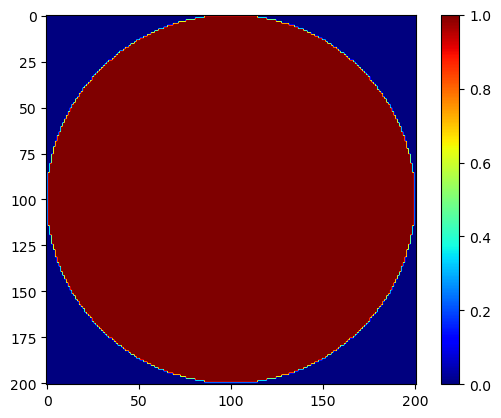

In [17]:
plt.imshow(mask)
plt.colorbar();

## Tx

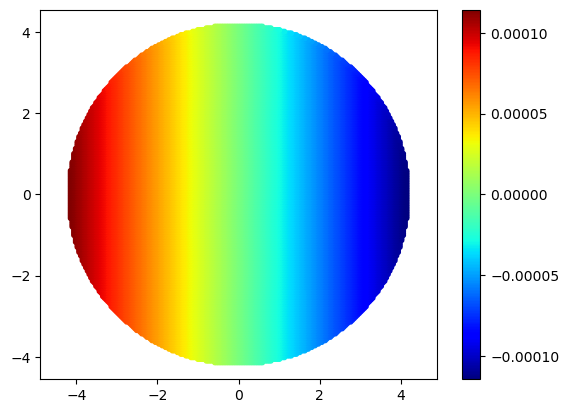

In [18]:
tx = tt
ty = 0
tz = 0

tn = tx*ux+ty*uy+tz*uz #inner product

plt.scatter(x_in_S1,y_in_S1, 10, c=tn)
plt.axis('equal')
plt.colorbar();

In [19]:
zer_tx = ZernikeMaskedFit(tn, xfit, yfit, n_of_zernikes, mask, 0)*1e9 #turn m into nm

print(zer_tx[4-1], np.sqrt(zer_tx[5-1]**2 + zer_tx[6-1]**2), np.sqrt(zer_tx[7-1]**2 + zer_tx[8-1]**2))
print('table col1 = 799, 539, 49')
print('table col2 (clocking) = __, 1280, 168')

4.147040444878701e-05 1.1341801448679931 68.46502519481545
table col1 = 799, 539, 49
table col2 (clocking) = __, 1280, 168


## Tz

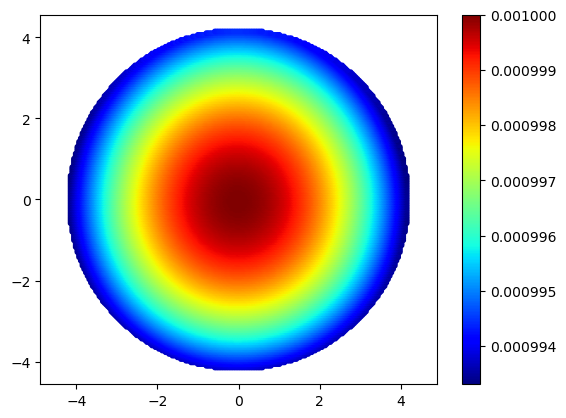

In [20]:
tx = 0
ty = tt*(-np.sin(np.radians(realTheta)))
tz = tt*(np.cos(np.radians(realTheta)))

tn = tx*ux+ty*uy+tz*uz #inner product

plt.scatter(x_in_S1,y_in_S1, 10, c=tn)
plt.axis('equal')
plt.colorbar();

In [21]:
zer_tz = ZernikeMaskedFit(tn, xfit, yfit, n_of_zernikes, mask, 0)*1e9 #turn m into nm

# Rx (50 arcsec)

50 arcsec is about 1mm TIR (total indicator runout)

2.5 arcsec is about 50 micron (approximately Laser tracker accuracy)

In [22]:
np.rad2deg(1e-3/radius_of_CA)*3600

49.31615212124241

In [23]:
r_in_S1 = np.sqrt((x_in_S1**2+y_in_S1**2))
tt = y_in_S1*np.radians(1./3600*50) ##rotate 50 arcsec

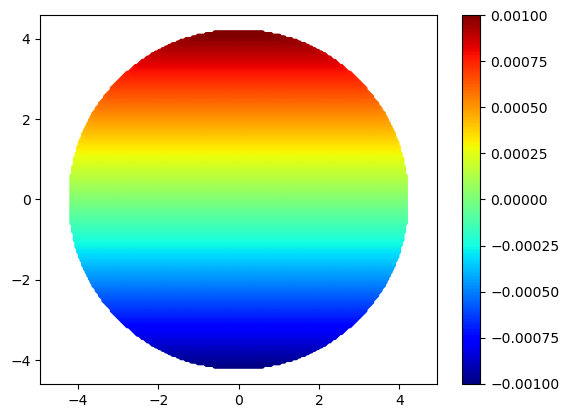

In [24]:
plt.scatter(x_in_S1,y_in_S1, 10*mask, c=tt*mask)
plt.axis('equal')
plt.colorbar();

In [25]:
tx = 0
myTheta = np.arctan((z-z0)/ (y_in_S1)) # positive on both sides #this is the angle similar to the 13.60 deg
myTheta[abs(y_in_S1)<1e-3] = 0 #remove those divided by zero

ty = tt*(-np.sin(myTheta))

tz = tt*np.cos(myTheta)

tn = tx*ux+ty*uy+tz*uz #inner product

In [26]:
np.sum(abs(y_in_S1)<1e-3)

201

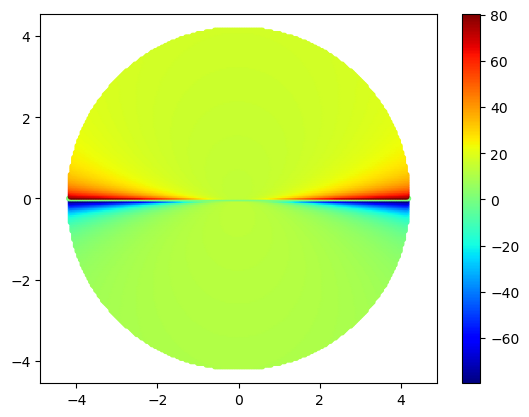

In [27]:
plt.scatter(x_in_S1,y_in_S1, 10, c=np.rad2deg(myTheta))
plt.axis('equal')
plt.colorbar();

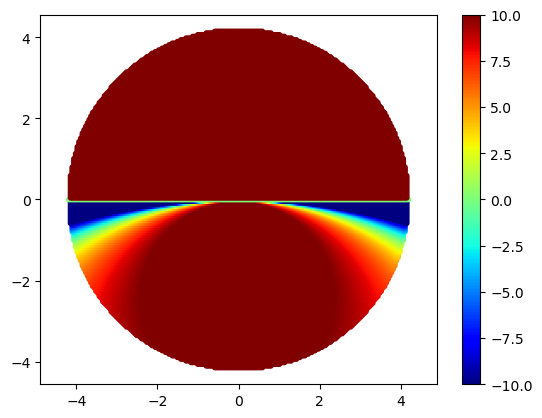

In [28]:
plt.scatter(x_in_S1,y_in_S1, 10, c=np.clip(np.rad2deg(myTheta), -10, 10))
plt.axis('equal')
plt.colorbar(); #yes, positive on top and bottom

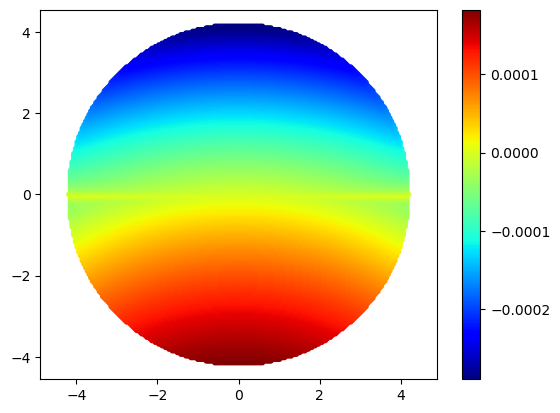

In [29]:
plt.scatter(x_in_S1,y_in_S1, 10, c=ty)
plt.axis('equal')
plt.colorbar();

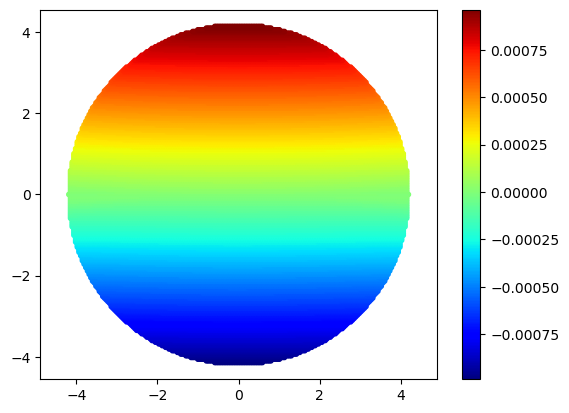

In [30]:
plt.scatter(x_in_S1,y_in_S1, 10, c=tz)
plt.axis('equal')
plt.colorbar();

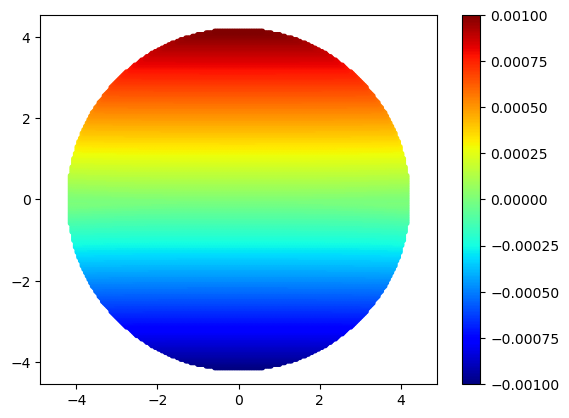

In [31]:
plt.scatter(x_in_S1,y_in_S1, 10, c=tn)
plt.axis('equal')
plt.colorbar();

In [32]:
zer_rx = ZernikeMaskedFit(tn, xfit, yfit, n_of_zernikes, mask, 0)*1e9 #turn m into nm

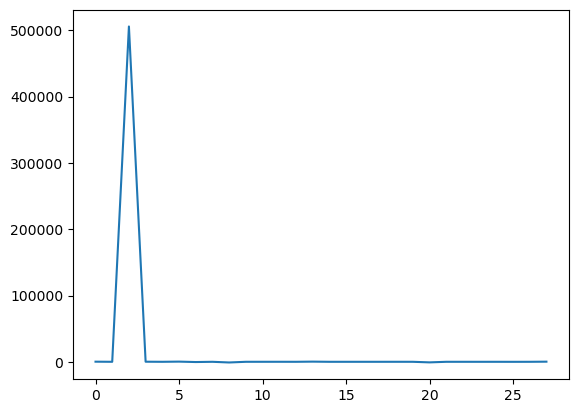

In [33]:
plt.plot(zer_rx)

## Ry

In [34]:
tt = -x_in_S1*np.radians(1./3600*50) ##rotate 50 arcsec

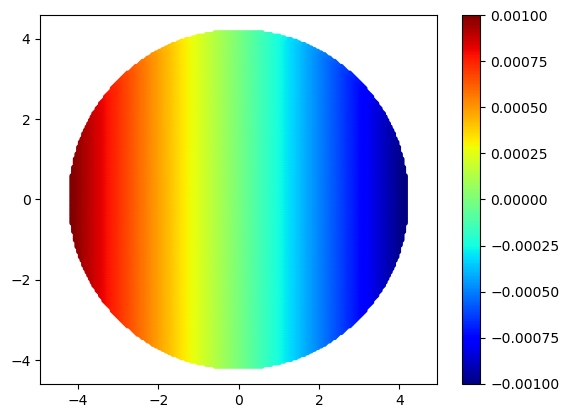

In [35]:
plt.scatter(x_in_S1,y_in_S1, 10*mask, c=tt*mask)
plt.axis('equal')
plt.colorbar();

In [36]:

#If the mirror is plannar, then all the nodes either moves away or closer to the center of curvature.
# with that approximation, this should be just a tilt.
# If we want to take into account the curvature of the mirror surface, the rotation in 3D is very complicated.
#I cannot wrap this around in my head. 

ty = 0
myTheta = np.arctan((z-z0)/ (x_in_S1)) # positive on both sides #this is the angle similar to the 13.60 deg
myTheta[abs(x_in_S1)<1e-3] = 0 #remove those divided by zero

tx = tt*(-np.sin(myTheta))

tz = tt*np.cos(myTheta)

tn = tx*ux+ty*uy+tz*uz #inner product

## Rz

In [37]:
tt = r_in_S1*np.radians(1./3600*50) ##rotate 50 arcsec

sint = y_in_S1/r_in_S1
cost = x_in_S1/r_in_S1
tx = -tt*sint
ty = tt*cost
tz = 0

tn = tx*ux+ty*uy+tz*uz #inner product

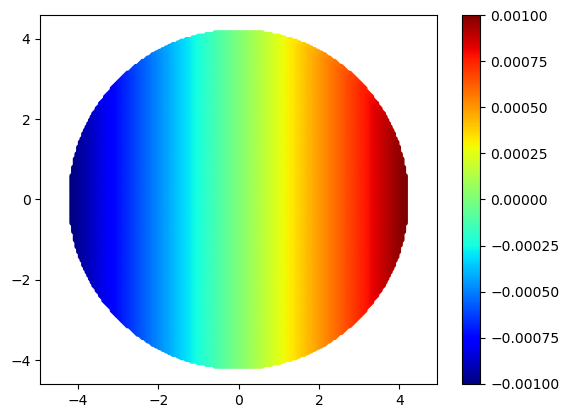

In [38]:
plt.scatter(x_in_S1,y_in_S1, 10*mask, c=ty*mask)
plt.axis('equal')
plt.colorbar();

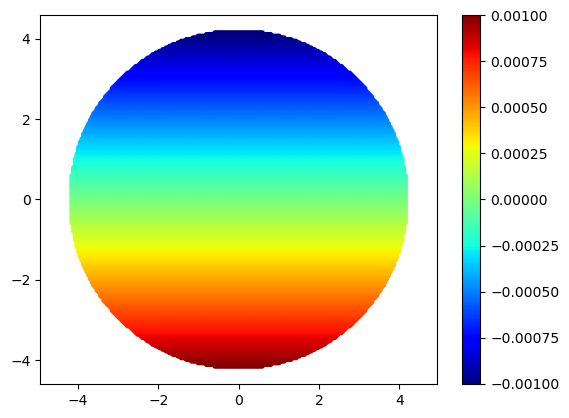

In [39]:
plt.scatter(x_in_S1,y_in_S1, 10*mask, c=tx*mask)
plt.axis('equal')
plt.colorbar();

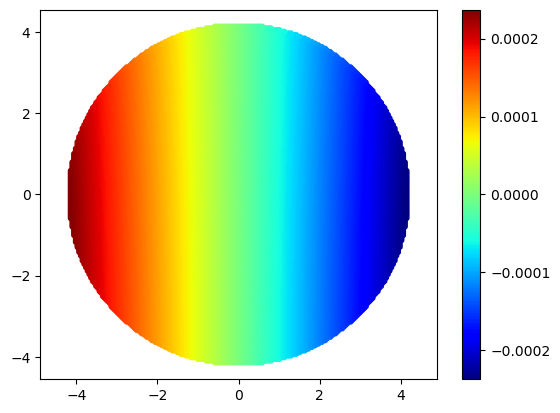

In [40]:
plt.scatter(x_in_S1,y_in_S1, 10*mask, c=tn*mask)
plt.axis('equal')
plt.colorbar();

In [41]:
zer_rz = ZernikeMaskedFit(tn, xfit, yfit, n_of_zernikes, mask, 0)*1e9 #turn m into nm

In [42]:
print(zer_rz[4-1], np.sqrt(zer_rz[5-1]**2 + zer_rz[6-1]**2), np.sqrt(zer_rz[7-1]**2 + zer_rz[8-1]**2))
print('table col1 = 799, 539, 49')
print('table col2 (clocking) = __, 1280, 168')

1.3718308444505417e-06 1942.349041329839 125.63286749177608
table col1 = 799, 539, 49
table col2 (clocking) = __, 1280, 168


In [43]:
zer_rz

array([ 3.72811726e-06, -1.18859411e+05,  7.02289401e-03,  1.37183084e-06,
        1.94234904e+03, -2.94349370e-06, -6.40448584e-06,  1.25632867e+02,
       -2.87648765e-05, -3.77819123e+02, -8.55060278e-07,  3.40708669e-06,
       -5.72978750e+00, -2.27719048e-06, -5.08488565e+01, -2.12427182e-01,
        1.40901350e-06,  6.37474688e-01, -4.72703465e-07, -1.06293315e+00,
        1.74664917e-07, -1.27567736e-06,  1.66041264e-02,  2.35330888e-06,
        5.47712157e-02, -3.61075068e-06,  5.00269057e-02,  1.78040905e-06])

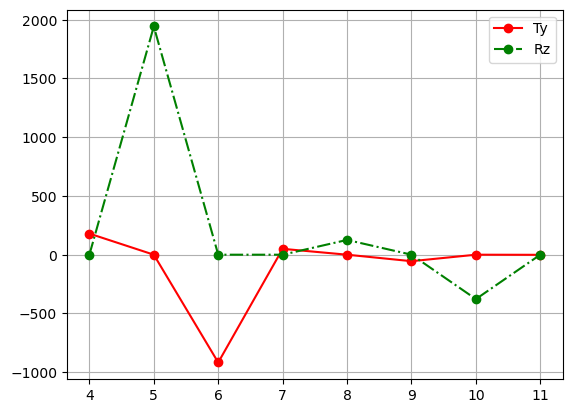

In [44]:
idx=np.arange(3,11)
px = idx+1
#plt.plot(px,zer_tx[idx],'-bo',label='Tx')
plt.plot(px,zer_ty[idx], '-ro', label='Ty')
#plt.plot(px,zer_tz[idx], '-go', label='Tz') #just power
#plt.plot(px,zer_rx[idx], '-.bo', label='Rx') #just tilt
plt.plot(px,zer_rz[idx], '-.go', label='Rz')
plt.legend()
plt.grid();